In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 



Inicialmente veremos con un gráfico de barras la cantidad comparativa de juegos diferentes por cada género.
Recordemos que un único juego (item_id) puede abarcar más de un género.

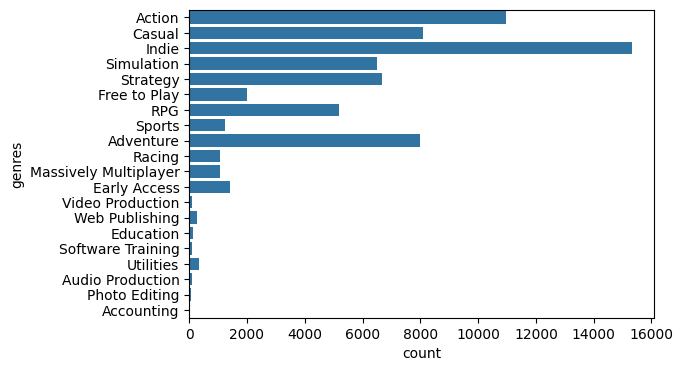

In [3]:
df_sgo1 = pd.read_parquet('Tablas/steam_games_output_limpio.parquet')
df_sgo1 = df_sgo1[['genres', 'id']]
df_sgo1.rename(columns={'id': 'item_id'}, inplace=True)
df_sgo1['item_id'] = df_sgo1['item_id'].astype(int)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_sgo1, y='genres', orient='h')
plt.show()



Ahora vamos a comparar el gráfico previo con la cantidad de usuarios que tenemos por género de juego. Como se puede apreciar, es ahora  el género Action el que tiene una amplia ventaja sobre los demás, seguido por Indie. Situación exactamente opuesta a la observada precedentemente. De mantenerse esta tendencia tal vez las desarrolladoras deberían incrementar la oferta de juegos de género Action para responder a esta manifiesta demanda.

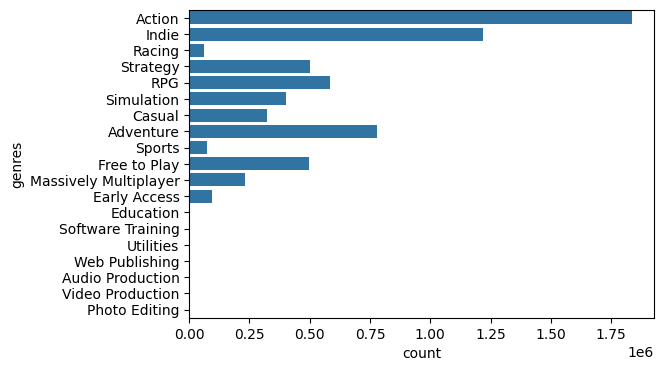

In [4]:
df_sgo1['item_id'] = df_sgo1['item_id'].astype(int)
df_ui1 = pd.read_parquet('Tablas/user_items_limpio.parquet')
df_ui1 = df_ui1[['item_id','user_id']]
df_join = pd.merge(df_sgo1, df_ui1, on='item_id')
df_join = df_join[['genres', 'user_id']]
plt.figure(figsize=(6, 4))
sns.countplot(data=df_join, y='genres', orient='h')
plt.show()


In [5]:
df = pd.read_parquet('Tablas/steam_games_output_limpio.parquet')
df = df[['id', 'developer', 'release_year']]

A continuación vemos la lista del top 10, por cantidad de juegos lanzados, de las empresas desarrolladoras.

In [8]:
top_10 = df.groupby('developer')['id'].count()
# ordeno los resultados de mayor a menor
top_10 = top_10.sort_values(ascending=False)
# selecciono los primeros 10 elementos
top_10 = top_10.head(10)
top_10

developer
Ubisoft - San Francisco       2462
SmiteWorks USA, LLC           2058
DL Softworks                   489
Ronimo Games                   373
Paradox Development Studio     311
Musopia                        279
Arcane Raise                   265
Choice of Games                248
Dovetail Games                 244
Boogygames Studios             232
Name: id, dtype: int64

A continuación analizo de la cantidad de usuarios registrados en user_items, cuántos efectuaron comentarios de los juegos. Me parece un dato muy importante a tener en cuenta para incorporar dichos comentarios a un sistema de recomendación utilizando machine learning. Casi el 80% de los usarios registrados no efectuaron comentarios, aunque seguramente tengan alguna opinión respecto a los juegos.

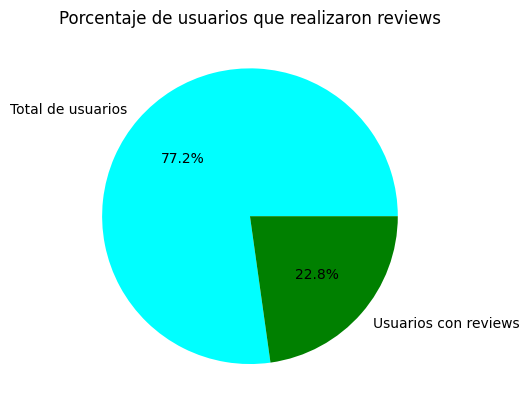

In [32]:
df = pd.read_parquet('Tablas/user_items_limpio.parquet')
# Me quedo con los usarios únicos de 2 dataframes
df = df.drop_duplicates(subset='user_id')
df.reset_index(drop=True, inplace=True)
df1 = pd.read_parquet('Tablas/user_review_final.parquet')
df1 = df1.drop_duplicates(subset='user_id')
df1.reset_index(drop=True, inplace=True)
# Hallo cuántos hicieron reviews
funcion = lambda x: x in df['user_id'].values
# aplico la función lambda a la columna 'user_id' de df
interseccion = df1['user_id'].apply(funcion)
# filtro el dataframe df1 según el resultado de la función lambda
df1_filtrado = df1[interseccion]

# Creo una lista con los valores a y b
valores = [df.shape[0], df1_filtrado.shape[0]]
# Asigno colores
colores = ['cyan', 'green']
# Rotulo cada sección
etiquetas = ['Total de usuarios', 'Usuarios con reviews']
# Defino parámetros
plt.pie(valores, colors=colores, labels=etiquetas, autopct='%1.1f%%')
# Muestro el gráfico
plt.title('Porcentaje de usuarios que realizaron reviews')
plt.show()
